## Problem Statement:
We aim to analyze what factors influence the **Interest Rate** of bank loans.

🔸 **Target Variable**: `Interest.Rate`  

🔸 **Type**: Numeric (continuous)

🔸 **Goal**: Understand relationships, trends, and outliers to prepare for modeling.




 # Bank Loan Dataset: Features with Categories

| Feature Name                 | Description                                             | Categories / Examples                                         |
| ---------------------------- | ------------------------------------------------------- | ------------------------------------------------------------- |
| `Amount.Requested`           | Loan amount requested by the customer                   | Numeric (e.g., 5000, 12000)                                   |
| `Amount.Funded.By.Investors` | Actual loan amount approved                             | Numeric (e.g., 4900, 11000)                                   |
| `Interest.Rates`             | Target: interest rate set by the bank                | Numeric (e.g., 7.2%, 13.49%)                                  |
| `Loan.Length`                | Duration of the loan                                    | Categorical → (e.g., 36 months, 60 months)                    |
| `Loan.Purpose`               | Purpose for which loan is taken                         | Categorical → (e.g., credit\_card, debt\_consolidation, car)  |
| `Debt.To.Income.Ratio`       | Ratio of customer's total debt to total income          | Numeric (e.g., 10.32%)                                        |
| `State`                      | Customer’s residential state                            | Categorical → (e.g., CA, NY, TX)                              |
| `Home.Ownership`             | Type of home ownership                                  | Categorical → (e.g., Rent, Mortgage, Own, Other)              |
| `Monthly.Income`             | Customer's reported monthly income                      | Numeric (e.g., 3500, 7200)                                    |
| `FICO.Range`                 | Credit score range (FICO)                               | Categorical → (e.g., 720-724, 700-704)                        |
| `Open.Credit.Lines`          | Number of current open credit accounts                  | Numeric (e.g., 4, 8)                                          |
| `Revolving.Credit.Balance`   | Total outstanding debt across revolving credit accounts | Numeric (e.g., 20000, 3500)                                   |
| `Inquiries.in.last.6.months` | Number of recent credit inquiries                       | Numeric (e.g., 0, 1, 2, 5)                                    |
| `Employment.Length`          | Length of employment                                    | Categorical → (e.g., 1 year, 10+ years, < 1 year, unemployed) |
| `ID`                         | Unique customer ID (not used in modeling)               | Unique identifier (e.g., 1248793)                             |


# 2. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import os
os.getcwd()

'c:\\Users\\naren\\Desktop\\New_DS\\LR_BankLoan\\notebook'

In [3]:
# Load raw data
df = pd.read_csv('data/raw/loan_data.csv')
# Preview
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


###########DO NOT RUN THE FOLLOWING CODE##################

In [ ]:
# Preserve original copy before cleaning
original_df = df.copy()

In [4]:
from datetime import datetime

# Step 1: Create a timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Step 2: Define backup filename
backup_filename = f"data/raw/bank_loan_data_backup_{timestamp}.csv"

# Step 3: Save the backup
original_df.to_csv(backup_filename, index=False)

print(f"✅ Backup saved to: {backup_filename}")

✅ Backup saved to: data/raw/bank_loan_data_backup_20250517_140843.csv


############################################

# 3. Dataset Overview

In [4]:
# Shape and info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

# 4. Summary Statistics

In [5]:
df.describe(include='all')  # Both numeric & categorical

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
count,2199.000000,2199,2199,2200,2199,2199,2199,2199,2199,2197.000000,2200,2196,2197,2197.000000,2131
unique,NaN,356,658,265,3,14,1526,46,5,NaN,38,29,2080,NaN,12
top,NaN,10000,10000,12.12%,36 months,debt_consolidation,0%,CA,MORTGAGE,NaN,670-674,8,0,NaN,10+ years
freq,NaN,178,146,114,1722,1147,7,376,1018,NaN,151,226,31,NaN,575
mean,52024.256480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5727.459290,NaN,NaN,NaN,0.898498,NaN
std,30223.972207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4073.529708,NaN,NaN,NaN,1.219223,NaN
min,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,588.500000,NaN,NaN,NaN,0.000000,NaN
25%,26361.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3458.000000,NaN,NaN,NaN,0.000000,NaN
50%,51302.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000,NaN,NaN,NaN,0.000000,NaN
75%,78386.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6883.330000,NaN,NaN,NaN,1.000000,NaN


# 5.Check Missing Values

In [6]:
df.isnull().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

# 6. Visualize Missing Values

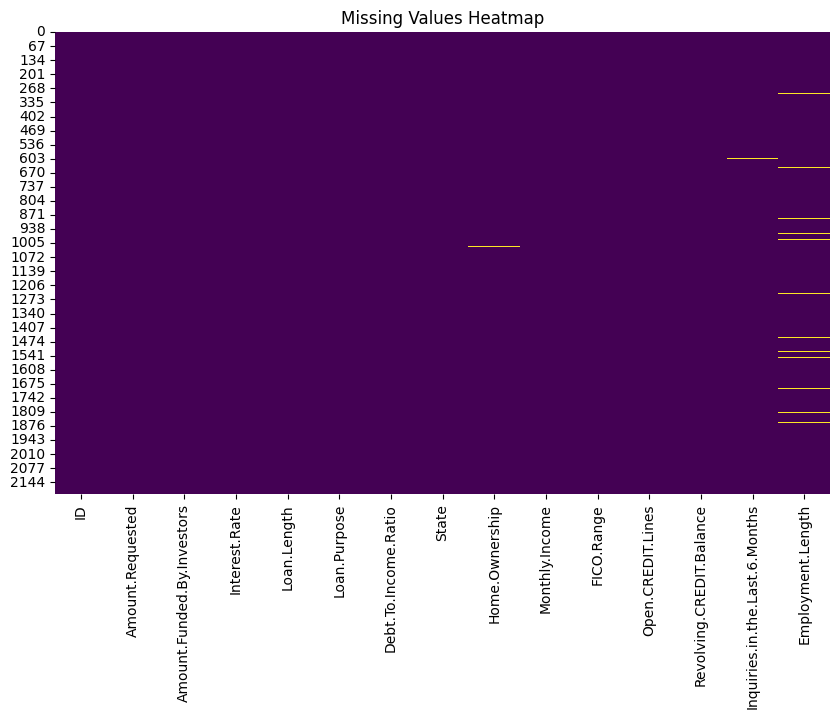

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#  Drop Useless Columns (e.g., ID)

In [7]:
df.drop(columns=["ID"], inplace=True)

# Check Data Types

In [8]:
df.dtypes

Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

#  Separate Categorical and Numerical Columns

In [9]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State', 'Home.Ownership', 'FICO.Range', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance', 'Employment.Length']
Numerical Columns: ['Monthly.Income', 'Inquiries.in.the.Last.6.Months']


# Explore Categorical Features

In [10]:
# Show missing values count for categorical columns only
print("🔍 Missing Values in Categorical Columns:")
print(df[categorical_cols].isnull().sum())

🔍 Missing Values in Categorical Columns:
Amount.Requested               1
Amount.Funded.By.Investors     1
Interest.Rate                  0
Loan.Length                    1
Loan.Purpose                   1
Debt.To.Income.Ratio           1
State                          1
Home.Ownership                 1
FICO.Range                     0
Open.CREDIT.Lines              4
Revolving.CREDIT.Balance       3
Employment.Length             69
dtype: int64


#  Handle Missing Values in Categorical Columns

Iterates over each categorical column

If it has missing values, it fills them with the most frequent category in that column

df[col]	Selects one column from the DataFrame

.mode()	Returns the most frequent value(s) in that column as a Series

[0]	Gets the first value from that Series (the mode)

.fillna(..., inplace=True)	Fills missing values in that column with the mode directly in the original DataFrame

In [11]:
# Fill missing categorical values with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0])

# Check Missing Values in Numerical Columns

In [12]:
df[numerical_cols].isnull().sum()

Monthly.Income                    3
Inquiries.in.the.Last.6.Months    3
dtype: int64

#  Handle Missing Values in Numerical Columns

In [13]:
# Fill missing numeric values with median
# Safely fill missing numeric values
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Check Total Missing Values in Entire DataFrame

In [14]:
df.isnull().sum().sum()

np.int64(83)

#  Display Missing Columns with a Title

In [15]:
df.isnull().sum()[df.isnull().sum() > 0]

Amount.Requested               1
Amount.Funded.By.Investors     1
Loan.Length                    1
Loan.Purpose                   1
Debt.To.Income.Ratio           1
State                          1
Home.Ownership                 1
Open.CREDIT.Lines              4
Revolving.CREDIT.Balance       3
Employment.Length             69
dtype: int64

#  Summary Statistics of Numeric Columns

In [17]:
df[numerical_cols].describe()

,Monthly.Income,Inquiries.in.the.Last.6.Months
count,2200.000000,2200.000000
mean,5726.467300,0.897273
std,4070.838644,1.218842
min,588.500000,0.000000
25%,3458.000000,0.000000
50%,5000.000000,0.000000
75%,6877.082500,1.000000
max,102750.000000,9.000000


#  Show All Unique Values in a DataFrame

In [16]:
unique_vals_df = pd.DataFrame({
    'Column': categorical_cols,
    'Unique Values': [df[col].unique().tolist() for col in categorical_cols]
})

unique_vals_df

,Column,Unique Values
0,Amount.Requested,"[25000, 19750, 2100, 28000, 24250, 5400, 16000..."
1,Amount.Funded.By.Investors,"[25000, 19750, 2100, 28000, 17431.82, 5375, 16..."
2,Interest.Rate,"[18.49%, 17.27%, 14.33%, 16.29%, 12.23%, 8.90%..."
3,Loan.Length,"[60 months, 36 months, nan, .]"
4,Loan.Purpose,"[debt_consolidation, major_purchase, credit_ca..."
5,Debt.To.Income.Ratio,"[27.56%, 13.39%, 3.50%, 19.62%, 23.79%, 6.27%,..."
6,State,"[VA, NY, LA, NV, OH, CA, IL, NC, NJ, WA, CT, A..."
7,Home.Ownership,"[MORTGAGE, OWN, RENT, OTHER, nan, NONE]"
8,FICO.Range,"[720-724, 710-714, 690-694, 730-734, 785-789, ..."
9,Open.CREDIT.Lines,"[11, 14, 13, 12, 6, 2, 5, 24, 7, 10, 8, 4, 15,..."



# Checking and changing datatypes

In [17]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [18]:
df.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

# Clean Column Names

In [19]:
df.columns = df.columns.str.replace('.', '_', regex=False) \
                       .str.replace(' ', '_') \
                       .str.lower()
df.columns

# Think of it like:
# "." → only dot ( one special character). Use regex=False 

# ".*" or patterns → then use regex

Index(['amount_requested', 'amount_funded_by_investors', 'interest_rate',
       'loan_length', 'loan_purpose', 'debt_to_income_ratio', 'state',
       'home_ownership', 'monthly_income', 'fico_range', 'open_credit_lines',
       'revolving_credit_balance', 'inquiries_in_the_last_6_months',
       'employment_length'],
      dtype='object')

# Working on Columns can be converted into numeric ones:

In [20]:
cols_to_convert = [
    'amount_requested',
    'amount_funded_by_investors',
    'open_credit_lines',
    'revolving_credit_balance',
    'inquiries_in_the_last_6_months'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# errors='coerce' means:
# If the value can’t be converted to a number, turn it into NaN (missing value) — don’t crash the code.

# Checking NaN values in above columns (cols_to_convert): 

In [21]:
# Define columns to convert
cols_to_convert = [
    'amount_requested',
    'amount_funded_by_investors',
    'open_credit_lines',
    'revolving_credit_balance',
    'inquiries_in_the_last_6_months'
]

# Convert to numeric and count NaNs
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 🔄 force conversion, non-numeric → NaN
    print(f"NaN values in '{col}':", df[col].isna().sum())

NaN values in 'amount_requested': 5
NaN values in 'amount_funded_by_investors': 4
NaN values in 'open_credit_lines': 7
NaN values in 'revolving_credit_balance': 5
NaN values in 'inquiries_in_the_last_6_months': 0


#  Filling NaNs with Median

In [22]:
for col in [
    'amount_requested',
    'amount_funded_by_investors',
    'open_credit_lines',
    'revolving_credit_balance'
]:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"Filled NaNs in '{col}' with median value: {median_val}")
# Check for any remaining NaN values
remaining_nans = df.isna().sum().sum()
print("Remaining NaN values in the DataFrame:", remaining_nans)

Filled NaNs in 'amount_requested' with median value: 10000.0
Filled NaNs in 'amount_funded_by_investors' with median value: 10000.0
Filled NaNs in 'open_credit_lines' with median value: 9.0
Filled NaNs in 'revolving_credit_balance' with median value: 11011.0
Remaining NaN values in the DataFrame: 74


# Working on Columns can be converted into categorical ones:

In [23]:
df.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,state,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,employment_length
0,25000.0,25000.00,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,19750.0,19750.00,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,2100.0,2100.00,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,28000.0,28000.00,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,24250.0,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years


In [24]:
df.columns

Index(['amount_requested', 'amount_funded_by_investors', 'interest_rate',
       'loan_length', 'loan_purpose', 'debt_to_income_ratio', 'state',
       'home_ownership', 'monthly_income', 'fico_range', 'open_credit_lines',
       'revolving_credit_balance', 'inquiries_in_the_last_6_months',
       'employment_length'],
      dtype='object')

# Check for Special Characters in 'interest_rate' and 'debt_to_income_ratio', which has % sign

This code checks each column for unexpected special characters (excluding digits, dots, and %) by treating all values—including NaNs—as strings.

In [25]:
import re

def find_special_chars(series):
    # Convert everything to string (including NaNs)
    full_text = ''.join(series.astype(str))
    # Find characters that are NOT digits, dot, or %
    return set(re.findall(r"[^\d\.%]", full_text))

# Check both columns
print("Special characters in 'interest_rate':", find_special_chars(df['interest_rate']))
print("Special characters in 'debt_to_income_ratio':", find_special_chars(df['debt_to_income_ratio']))

Special characters in 'interest_rate': set()
Special characters in 'debt_to_income_ratio': {'a', 'n'}


# Check for NaNs in each column

In [26]:
print("NaNs in 'interest_rate':", df['interest_rate'].isna().sum())
print("NaNs in 'debt_to_income_ratio':", df['debt_to_income_ratio'].isna().sum())

NaNs in 'interest_rate': 0
NaNs in 'debt_to_income_ratio': 1


interest_rate or debt_to_income_ratio shows 'nan' as a string again.

# Replace NaN with mode (most common value)

In [27]:
mode_dti = df['debt_to_income_ratio'].mode()[0]
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].fillna(mode_dti)

# Re-validate NaN count and special characters

In [30]:
import re
import pandas as pd

#  Clean % and bad 'nan'-like strings → float
def clean_percentage_nan_column(series):
    return (
        series
        .astype(str)
        .str.strip()
        .str.rstrip('%')
        .replace(['nan', 'NaN', 'None', ''], pd.NA)
        .astype(float)
    )

#  Apply cleaning
df['interest_rate'] = clean_percentage_nan_column(df['interest_rate'])
df['debt_to_income_ratio'] = clean_percentage_nan_column(df['debt_to_income_ratio'])

#  Validate cleanup
def find_special_chars(series):
    text = ''.join(series.dropna().astype(str))
    return set(re.findall(r"[^\d\.]", text))

print("NaNs in 'interest_rate':", df['interest_rate'].isna().sum())
print("NaNs in 'debt_to_income_ratio':", df['debt_to_income_ratio'].isna().sum())
print("Special chars in 'interest_rate':", find_special_chars(df['interest_rate']))
print("Special chars in 'debt_to_income_ratio':", find_special_chars(df['debt_to_income_ratio']))


NaNs in 'interest_rate': 0
NaNs in 'debt_to_income_ratio': 0
Special chars in 'interest_rate': set()
Special chars in 'debt_to_income_ratio': set()


In [31]:
df.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,state,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,employment_length
0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,2100.0,2100.00,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,28000.0,28000.00,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,24250.0,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years


In [29]:
df.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,state,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,employment_length
0,25000.0,25000.00,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years
1,19750.0,19750.00,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years
2,2100.0,2100.00,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year
3,28000.0,28000.00,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years
4,24250.0,17431.82,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   amount_requested                2200 non-null   float64
 1   amount_funded_by_investors      2200 non-null   float64
 2   interest_rate                   2200 non-null   float64
 3   loan_length                     2199 non-null   object 
 4   loan_purpose                    2199 non-null   object 
 5   debt_to_income_ratio            2200 non-null   float64
 6   state                           2199 non-null   object 
 7   home_ownership                  2199 non-null   object 
 8   monthly_income                  2200 non-null   float64
 9   fico_range                      2200 non-null   object 
 10  open_credit_lines               2200 non-null   float64
 11  revolving_credit_balance        2200 non-null   float64
 12  inquiries_in_the_last_6_months  22

# Preview Unique Values in Each remaining Column as below:

In [33]:
categorical_check_cols = [
    'loan_length',
    'loan_purpose',
    'home_ownership',
    'state',
    'fico_range',
    'employment_length'
]

for col in categorical_check_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'loan_length':
['60 months' '36 months' nan '.']
----------------------------------------
Unique values in 'loan_purpose':
['debt_consolidation' 'major_purchase' 'credit_card' 'small_business'
 'home_improvement' 'other' 'car' 'moving' 'house' 'educational'
 'vacation' 'wedding' 'medical' nan 'renewable_energy']
----------------------------------------
Unique values in 'home_ownership':
['MORTGAGE' 'OWN' 'RENT' 'OTHER' nan 'NONE']
----------------------------------------
Unique values in 'state':
['VA' 'NY' 'LA' 'NV' 'OH' 'CA' 'IL' 'NC' 'NJ' 'WA' 'CT' 'AK' 'CO' 'MA'
 'TX' 'VT' 'OK' 'FL' 'NH' 'GA' 'MN' 'MD' 'WY' 'PA' 'AL' 'AZ' 'SC' 'MI'
 'OR' 'RI' 'NM' 'MO' 'WI' 'KY' 'UT' 'AR' 'WV' 'DE' 'MT' 'KS' 'DC' 'SD'
 'HI' 'IN' 'MS' nan '.']
----------------------------------------
Unique values in 'fico_range':
['720-724' '710-714' '690-694' '730-734' '785-789' '665-669' '735-739'
 '740-744' '765-769' '800-804' '680-684' '745-749' '660-664' '670-674'
 '705-709' '695-699' '715-719

# Clean 'loan_length': 

Clean 'loan_length': Replace '.' with NaN, then extract numeric part from strings like '36 months'


df['loan_length'].str.extract('(\d+)')

This returns only the numeric part from strings like:

"60 months" → 60

"< 1 year" → 1

"." → NaN (nothing to extract)

Finally, it gives the numeric values.

In [34]:
df['loan_length'] = df['loan_length'].replace('.', np.nan)
df['loan_length'] = df['loan_length'].str.extract('(\d+)').astype(float)
df['loan_length'].isnull().sum()

np.int64(2)

Conclusion: There is 2 missing value (NaN) in the loan_length column.

# Fill missing value in 'loan_length' using mode (most common loan duration)

In [35]:
mode_loan_length = df['loan_length'].mode()[0]
df['loan_length'] = df['loan_length'].fillna(mode_loan_length)
print(f"Filled NaN in 'loan_length' with mode value: {mode_loan_length}")
df['loan_length'].isnull().sum()

Filled NaN in 'loan_length' with mode value: 36.0


np.int64(0)

# Clean 'loan_purpose'

In [36]:
# Check for missing values in the 'loan_purpose' column
df['loan_purpose'].isnull().sum()

np.int64(1)

#  Replace missing values with the mode

In [37]:
# 1. Check missing values
print("Missing values in 'loan_purpose':", df['loan_purpose'].isnull().sum())

# 2. Replace missing values with the mode
mode_value = df['loan_purpose'].mode()[0]
df['loan_purpose'] = df['loan_purpose'].fillna(mode_value)

# 3. Confirm fix
print("Missing values after filling:", df['loan_purpose'].isnull().sum())

Missing values in 'loan_purpose': 1
Missing values after filling: 0


Conclusion: 

 There are zero missing values (NaN) in the loan_purpose column — the data is complete and clean.

#  Group into Fewer Categories (Domain-Aware Clustering)

| Group Name       | Original Values                                                               |
| ---------------- | ----------------------------------------------------------------------------- |
| `debt_related`   | `'debt_consolidation'`, `'credit_card'`                                       |
| `large_purchase` | `'major_purchase'`, `'car'`, `'home_improvement'`, `'house'`, `'moving'`      |
| `small_personal` | `'vacation'`, `'wedding'`, `'medical'`, `'educational'`, `'renewable_energy'` |
| `business`       | `'small_business'`                                                            |
| `other`          | `'other'`                                                                     |


In [38]:
purpose_map = {
    'debt_consolidation': 'debt_related',
    'credit_card': 'debt_related',
    'major_purchase': 'large_purchase',
    'car': 'large_purchase',
    'home_improvement': 'large_purchase',
    'house': 'large_purchase',
    'moving': 'large_purchase',
    'vacation': 'small_personal',
    'wedding': 'small_personal',
    'medical': 'small_personal',
    'educational': 'small_personal',
    'renewable_energy': 'small_personal',
    'small_business': 'business',
    'other': 'other'
}

df['loan_purpose_grouped'] = df['loan_purpose'].map(purpose_map)
df['loan_purpose_grouped'].isnull().sum()
df['loan_purpose_grouped'].unique()

array(['debt_related', 'large_purchase', 'business', 'other',
       'small_personal'], dtype=object)

In [40]:
df['loan_purpose_grouped'].isna().any()

np.False_

In [39]:
df.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,state,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,employment_length,loan_purpose_grouped
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,MORTGAGE,8606.56,720-724,11.0,15210.0,3.0,5 years,debt_related
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,MORTGAGE,6737.50,710-714,14.0,19070.0,3.0,4 years,debt_related
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,OWN,1000.00,690-694,13.0,893.0,1.0,< 1 year,large_purchase
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,MORTGAGE,7083.33,710-714,12.0,38194.0,1.0,10+ years,debt_related
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,MORTGAGE,5833.33,730-734,6.0,31061.0,2.0,10+ years,debt_related


# Clean Format: home_ownership

In [41]:
df['home_ownership'] = df['home_ownership'].str.strip().str.lower()
df['home_ownership'].unique()
df['home_ownership'].value_counts()

home_ownership
mortgage    1018
rent         999
own          177
other          4
none           1
Name: count, dtype: int64

In [42]:
#  Group rare categories: We can group 'other' Merge into 'own' and 'none' into into 'rent'  bucket

# 1. Standardize formatting
df['home_ownership'] = df['home_ownership'].str.strip().str.lower()

# 2. Replace rare categories
df['home_ownership'] = df['home_ownership'].replace({
    'other': 'own',
    'none': 'rent'
})

# 3. Check for missing values
print("Missing values in 'home_ownership':", df['home_ownership'].isnull().sum())

# 4. Check unique values
print("Unique values:", df['home_ownership'].unique())

# 5. Check value counts
print("Value counts:\n", df['home_ownership'].value_counts())

Missing values in 'home_ownership': 1
Unique values: ['mortgage' 'own' 'rent' nan]
Value counts:
 home_ownership
mortgage    1018
rent        1000
own          181
Name: count, dtype: int64


In [43]:
# Fill the missing value with the mode
mode_home = df['home_ownership'].mode()[0]
df['home_ownership'] = df['home_ownership'].fillna(mode_home)

# Confirm fix
print("Missing values after filling:", df['home_ownership'].isnull().sum())
print("Final value counts:\n", df['home_ownership'].value_counts())


Missing values after filling: 0
Final value counts:
 home_ownership
mortgage    1019
rent        1000
own          181
Name: count, dtype: int64


# Cleaning "state" column:

In [44]:
import numpy as np

# 1. Replace '.' with real NaN
df['state'] = df['state'].replace('.', np.nan)

# 2. Fill missing values with the mode
mode_state = df['state'].mode()[0]
df['state'] = df['state'].fillna(mode_state)

# 3. Confirm fix
print("Missing values in 'state':", df['state'].isna().sum())
print("Unique values in 'state':", sorted(df['state'].unique()))

Missing values in 'state': 0
Unique values in 'state': ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


# This means: There is 0 missing value in the state column.

## Fill Missing Value in state

## Standardize formatting (just in case)

In [45]:
df['state'] = df['state'].str.upper().str.strip()
df['state'].unique()
df['state'].value_counts()

state
CA    378
NY    231
FL    149
TX    146
PA     88
IL     87
GA     82
NJ     81
VA     70
MA     64
OH     59
MD     59
NC     59
CO     54
WA     52
AZ     44
CT     44
MI     38
AL     34
MN     30
NV     29
MO     29
SC     27
WI     25
OR     25
KS     21
LA     20
KY     20
OK     20
NH     14
UT     13
RI     13
HI     12
WV     12
NM     12
AR     11
DC      9
AK      8
MT      7
DE      7
VT      5
WY      4
SD      4
IN      3
MS      1
Name: count, dtype: int64

# Grouping U.S. states into 5 major geographical regions


| Region        | States                                                     |
| ------------- | ---------------------------------------------------------- |
| **northeast** | ME, NH, VT, MA, RI, CT, NY, NJ, PA                         |
| **southeast** | DE, MD, DC, VA, WV, KY, TN, NC, SC, GA, FL, AL, MS, AR, LA |
| **midwest**   | OH, MI, IN, IL, WI, MO, IA, MN, ND, SD, NE, KS             |
| **southwest** | TX, OK, NM, AZ                                             |
| **west**      | CO, WY, MT, ID, WA, OR, UT, NV, CA, AK, HI                 |


In [46]:
region_map = {
    'northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'southeast': ['DE', 'MD', 'DC', 'VA', 'WV', 'KY', 'TN', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA'],
    'midwest':   ['OH', 'MI', 'IN', 'IL', 'WI', 'MO', 'IA', 'MN', 'ND', 'SD', 'NE', 'KS'],
    'southwest': ['TX', 'OK', 'NM', 'AZ'],
    'west':      ['CO', 'WY', 'MT', 'ID', 'WA', 'OR', 'UT', 'NV', 'CA', 'AK', 'HI']
}

state_to_region = {state: region for region, states in region_map.items() for state in states}

# Apply to the DataFrame
df['state_region'] = df['state'].map(state_to_region)
# Check for NaN values in 'state_region'
missing_state_region = df['state_region'].isnull().sum()
print(f"Missing values in 'state_region': {missing_state_region}")

Missing values in 'state_region': 0


# Cleaning on "fico_range" column

| Part of Code                  | Meaning                                                                |
| ----------------------------- | ---------------------------------------------------------------------- |
| `df['fico_range']`            | Access the original column containing strings like `"720-724"`         |
| `.str.split('-')`             | Splits the string at `-`, turns it into a list: `['720', '724']`       |
| `.apply(lambda x: ...)`       | Applies a custom function to each row (each list of strings)           |
| `isinstance(x, list)`         | Checks that `x` is indeed a list (not a bad/missing value)             |
| `len(x) == 2`                 | Ensures the list has exactly 2 values (start and end of FICO range)    |
| `(int(x[0]) + int(x[1])) / 2` | Converts both values to integers and calculates their average          |
| `else np.nan`                 | If it’s not a proper list of two numbers, assign `NaN` (missing value) |

In [47]:
df['fico_range'] = df['fico_range'].str.split('-').apply(
    lambda x: (int(x[0]) + int(x[1])) / 2 if isinstance(x, list) and len(x) == 2 else np.nan
)
df['fico_range'].isnull().sum()

np.int64(0)

There are no missing (NaN) values in the fico_range column — it's fully cleaned and ready to use! 

In [49]:
df.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,state,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,employment_length,loan_purpose_grouped,state_region
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,mortgage,8606.56,722.0,11.0,15210.0,3.0,5 years,debt_related,southeast
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,mortgage,6737.50,712.0,14.0,19070.0,3.0,4 years,debt_related,northeast
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,own,1000.00,692.0,13.0,893.0,1.0,< 1 year,large_purchase,southeast
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,mortgage,7083.33,712.0,12.0,38194.0,1.0,10+ years,debt_related,west
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,mortgage,5833.33,732.0,6.0,31061.0,2.0,10+ years,debt_related,midwest


# Cleaning 'employment_length' column


| Original Value | Group        |
| -------------- | ------------ |
| `< 1 year`     | `very_short` |
| `1 year`       | `very_short` |
| `2 years`      | `short`      |
| `3 years`      | `short`      |
| `4 years`      | `medium`     |
| `5 years`      | `medium`     |
| `6 years`      | `long`       |
| `7 years`      | `long`       |
| `8 years`      | `long`       |
| `9 years`      | `long`       |
| `10+ years`    | `long`       |
| `.`            | `NaN`        |
"NaN"             | Mode value   |


df['employment_length_group'] will have:


['very_short', 'short', 'medium', 'long', NaN]


In [50]:
# 1. Replace '.' with real NaN
df['employment_length'] = df['employment_length'].replace('.', np.nan)

# 2. Option A: Fill with mode (most common value)
mode_emp = df['employment_length'].mode()[0]
df['employment_length'] = df['employment_length'].fillna(mode_emp)

# Optional: To confirm
print("Missing values:", df['employment_length'].isna().sum())
print("Unique values:", df['employment_length'].unique())

Missing values: 0
Unique values: ['5 years' '4 years' '< 1 year' '10+ years' '2 years' '8 years' '1 year'
 '6 years' '7 years' '3 years' '9 years']


In [51]:
# Map exact values to grouped categories
emp_map = {
    '< 1 year': 'very_short',
    '1 year': 'very_short',
    '2 years': 'short',
    '3 years': 'short',
    '4 years': 'medium',
    '5 years': 'medium',
    '6 years': 'long',
    '7 years': 'long',
    '8 years': 'long',
    '9 years': 'long',
    '10+ years': 'long'
}

df['employment_length_group'] = df['employment_length'].map(emp_map)

In [53]:
df.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,state,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,employment_length,loan_purpose_grouped,state_region,employment_length_group
0,25000.0,25000.00,18.49,60.0,debt_consolidation,27.56,VA,mortgage,8606.56,722.0,11.0,15210.0,3.0,5 years,debt_related,southeast,medium
1,19750.0,19750.00,17.27,60.0,debt_consolidation,13.39,NY,mortgage,6737.50,712.0,14.0,19070.0,3.0,4 years,debt_related,northeast,medium
2,2100.0,2100.00,14.33,36.0,major_purchase,3.50,LA,own,1000.00,692.0,13.0,893.0,1.0,< 1 year,large_purchase,southeast,very_short
3,28000.0,28000.00,16.29,36.0,credit_card,19.62,NV,mortgage,7083.33,712.0,12.0,38194.0,1.0,10+ years,debt_related,west,long
4,24250.0,17431.82,12.23,60.0,credit_card,23.79,OH,mortgage,5833.33,732.0,6.0,31061.0,2.0,10+ years,debt_related,midwest,long


# Deleting the Repeating columns

In [54]:
df = df.drop(columns=[
    'employment_length', 
    'loan_purpose', 
    'state'
])
df.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,debt_to_income_ratio,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,loan_purpose_grouped,state_region,employment_length_group
0,25000.0,25000.00,18.49,60.0,27.56,mortgage,8606.56,722.0,11.0,15210.0,3.0,debt_related,southeast,medium
1,19750.0,19750.00,17.27,60.0,13.39,mortgage,6737.50,712.0,14.0,19070.0,3.0,debt_related,northeast,medium
2,2100.0,2100.00,14.33,36.0,3.50,own,1000.00,692.0,13.0,893.0,1.0,large_purchase,southeast,very_short
3,28000.0,28000.00,16.29,36.0,19.62,mortgage,7083.33,712.0,12.0,38194.0,1.0,debt_related,west,long
4,24250.0,17431.82,12.23,60.0,23.79,mortgage,5833.33,732.0,6.0,31061.0,2.0,debt_related,midwest,long


In [55]:
df.columns

Index(['amount_requested', 'amount_funded_by_investors', 'interest_rate',
       'loan_length', 'debt_to_income_ratio', 'home_ownership',
       'monthly_income', 'fico_range', 'open_credit_lines',
       'revolving_credit_balance', 'inquiries_in_the_last_6_months',
       'loan_purpose_grouped', 'state_region', 'employment_length_group'],
      dtype='object')

In [56]:
df = df[['amount_requested', 'amount_funded_by_investors', 'interest_rate',
       'loan_length', 'debt_to_income_ratio', 'home_ownership',
       'monthly_income', 'fico_range', 'open_credit_lines',
       'revolving_credit_balance', 'inquiries_in_the_last_6_months',
       'loan_purpose_grouped', 'state_region', 'employment_length_group']]


In [ ]:
# ✔ CORRECT SAVE PATH (relative to current notebook directory)
df.to_csv("data/processed/cleaned_loan_data.csv", index=False)


# NOW, reading the Cleaned_data  from another folder

In [62]:
df = pd.read_csv("data/processed/cleaned_loan_data.csv")
df.head()

,amount_requested,amount_funded_by_investors,interest_rate,loan_length,debt_to_income_ratio,home_ownership,monthly_income,fico_range,open_credit_lines,revolving_credit_balance,inquiries_in_the_last_6_months,loan_purpose_grouped,state_region,employment_length_group
0,25000.0,25000.00,18.49,60.0,27.56,mortgage,8606.56,722.0,11.0,15210.0,3.0,debt_related,southeast,medium
1,19750.0,19750.00,17.27,60.0,13.39,mortgage,6737.50,712.0,14.0,19070.0,3.0,debt_related,northeast,medium
2,2100.0,2100.00,14.33,36.0,3.50,own,1000.00,692.0,13.0,893.0,1.0,large_purchase,southeast,very_short
3,28000.0,28000.00,16.29,36.0,19.62,mortgage,7083.33,712.0,12.0,38194.0,1.0,debt_related,west,long
4,24250.0,17431.82,12.23,60.0,23.79,mortgage,5833.33,732.0,6.0,31061.0,2.0,debt_related,midwest,long


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   amount_requested                2200 non-null   float64
 1   amount_funded_by_investors      2200 non-null   float64
 2   interest_rate                   2200 non-null   float64
 3   loan_length                     2200 non-null   float64
 4   debt_to_income_ratio            2200 non-null   float64
 5   home_ownership                  2200 non-null   object 
 6   monthly_income                  2200 non-null   float64
 7   fico_range                      2200 non-null   float64
 8   open_credit_lines               2200 non-null   float64
 9   revolving_credit_balance        2200 non-null   float64
 10  inquiries_in_the_last_6_months  2200 non-null   float64
 11  loan_purpose_grouped            2200 non-null   object 
 12  state_region                    22

# Univariate Analysis

 Numerical Columns: histograms, boxplots, stats

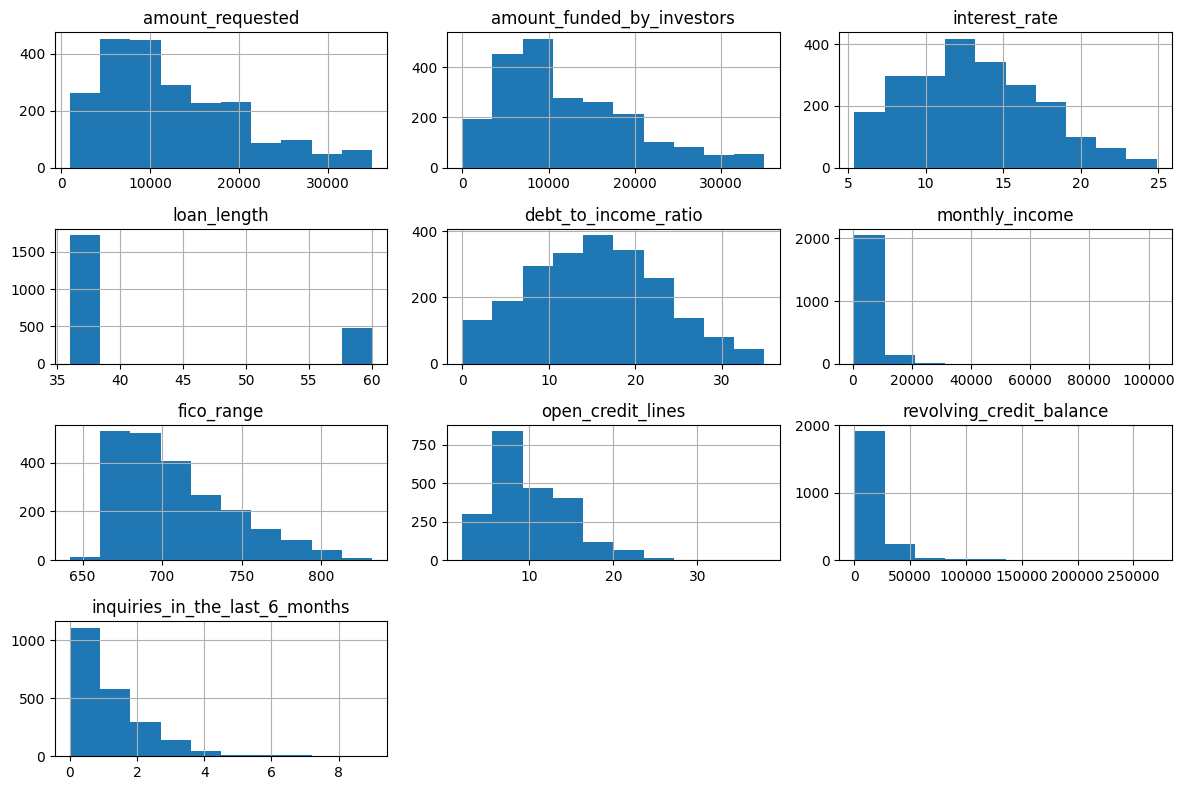

In [65]:
df.describe()
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# X-axis: showing the feature values

# Y-axis: showing how many records fall into each bin (frequency)

## Univariate Analysis – Numeric Features 

### 1. `amount_requested`
- Most people apply for loans below $15,000.
-  Right-skewed = A few people ask for very large loans, which pulls the graph to the right.

### 2. `amount_funded_by_investors`
- The actual funded amount is close to what people request.
-  Right-skewed = A small number of large loans were funded.

### 3. `interest_rate`
- Most interest rates fall between 8% and 16%.
-  Bell-shaped = Rates are evenly spread around an average — no extreme outliers.

### 4. `loan_length`
- Customers choose either 36-month or 60-month loans.
-  36 months is the most popular choice.

### 5. `debt_to_income_ratio`
- Most borrowers spend 10–20% of income on debt.
-  Fairly symmetric = Distribution is balanced, no strong extremes on either side.

### 6. `monthly_income`
- Most people earn under $10,000 per month.
-  Highly right-skewed = A few high-income individuals raise the upper end.

### 7. `fico_range`
- Most credit scores are between 660 and 720.
-  Slightly right-skewed = Some borrowers have very high scores, but not many.

### 8. `open_credit_lines`
- Most borrowers have 8 to 10 active credit lines.
-  Long tail after 20 = A few people have many more than average.

### 9. `revolving_credit_balance`
- Most people owe less than $25,000 on credit.
- Right-skewed = Some have high balances, but they are rare.

### 10. `inquiries_in_the_last_6_months`
- Most people had 0 to 2 recent credit checks.
-  Right-skewed = A few applied for credit many times.



# Categorical Columns: value counts, bar plots

Text(0, 0.5, 'Frequency')

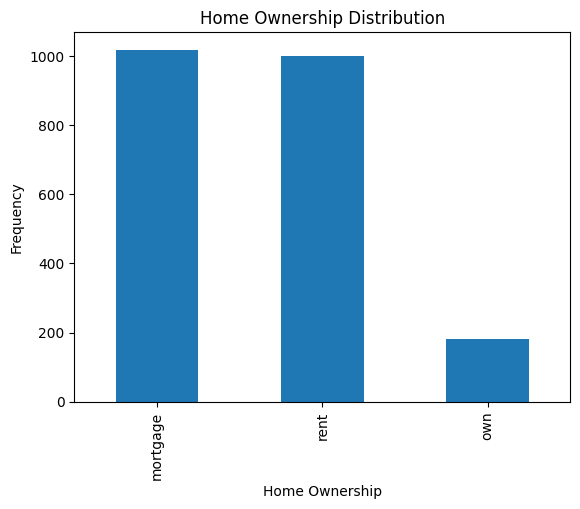

In [66]:
df['home_ownership'].value_counts().plot(kind='bar')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')

# Bivariate Analysis: Numeric vs Numeric: scatter plots, correlation

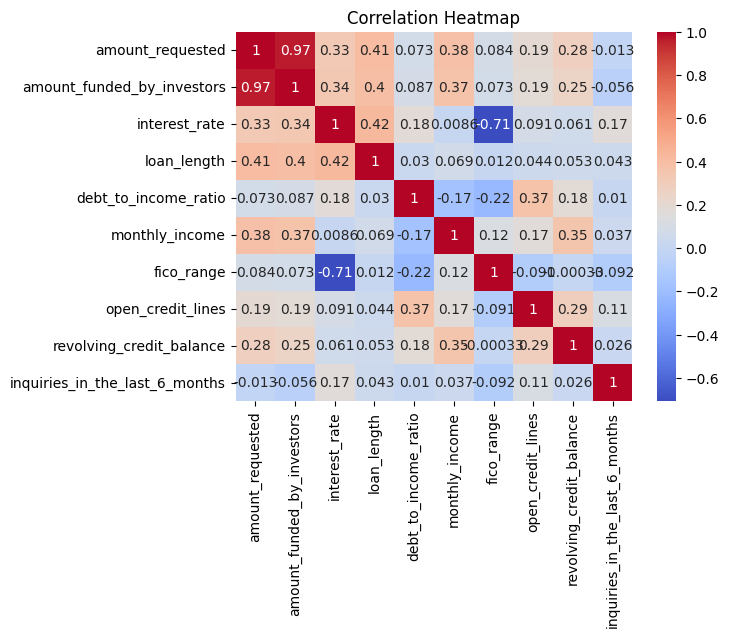

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot (optional)
sns.scatterplot(x='amount_requested', y='interest_rate', data=df)

# ✅ Heatmap only on numeric columns
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

##  Correlation Heatmap Interpretation

###  Strong Positive Correlation:
- **`amount_requested` & `amount_funded_by_investors`**: **0.97**  
  →  Higher loan requests usually receive similarly high funding.

---

###  Strong Negative Correlation:
- **`fico_range` & `interest_rate`**: **-0.71**  
  →  Borrowers with better credit scores tend to get lower interest rates.

---

###  Mild Positive Correlations:
- **`loan_length` & `interest_rate`**: **0.42**  
  →  Longer loans are slightly associated with higher interest rates.
- **`debt_to_income_ratio` & `open_credit_lines`**: **0.37**
- **`monthly_income` & `revolving_credit_balance`**: **0.35**
- **`amount_requested` & `loan_length`**: **0.41**
- **`amount_requested` & `monthly_income`**: **0.38**

---

###  Mild Negative Correlations:
- **`debt_to_income_ratio` & `monthly_income`**: **-0.17**
- **`interest_rate` & `monthly_income`**: **0.008 (≈ 0)**

---

###  Weak or No Correlation:
- **`interest_rate` & `monthly_income`**: **0.008**  
  →  Monthly income doesn’t strongly influence interest rate.
- **`inquiries_in_the_last_6_months`** with most variables  
  →  Borrower inquiries show minimal linear relationships.

---

### Summary:
- Most relationships are weak to moderate.
- Only a few strong correlations exist.
- Important insight: **Credit score has a clear effect on interest rate**.


# Bivariate Analysis:

Categorical vs Numeric: boxplot


Text(0.5, 0, 'Loan Purpose')

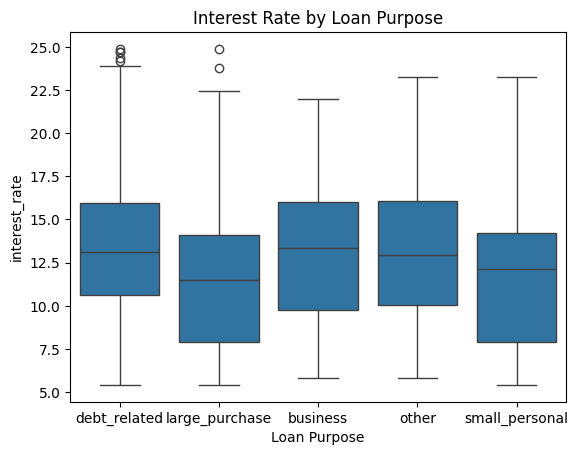

In [73]:
sns.boxplot(x='loan_purpose_grouped', y='interest_rate', data=df)
plt.title('Interest Rate by Loan Purpose')
plt.xlabel('Loan Purpose')

##  Boxplot: Interest Rate by Loan Purpose

### Observations:
- **`debt_related`** loans have the **highest median interest rate** and multiple **outliers** above 24%.
- **`large_purchase`** and **`small_personal`** loans have **lower medians** and **tighter interquartile ranges**, suggesting more consistent rates.
- **`business`** and **`other`** categories show moderate variability and median interest rates.

### Simple Insight:
- Borrowers taking loans to pay off **existing debt** generally face **higher interest rates**.
- Loans for **purchases** or **personal use** tend to have **lower and more stable rates**.
- The **reason for borrowing** can influence how much interest you’ll pay.


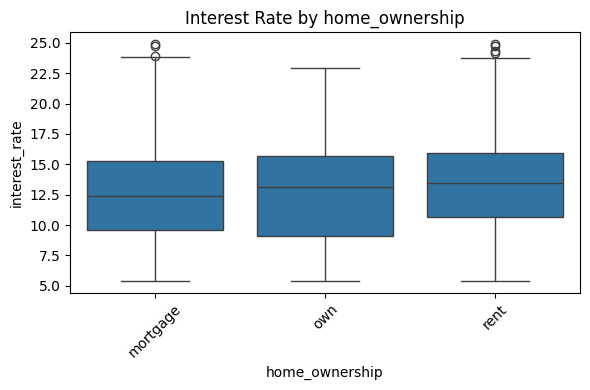

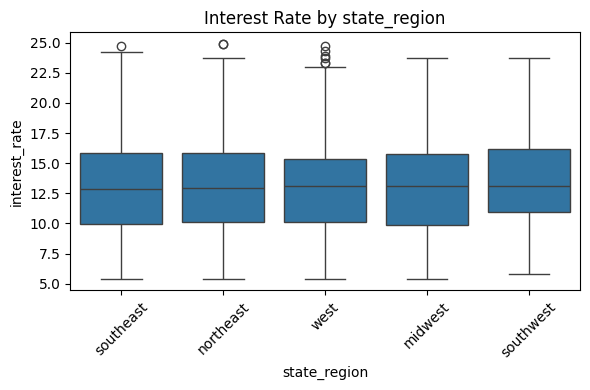

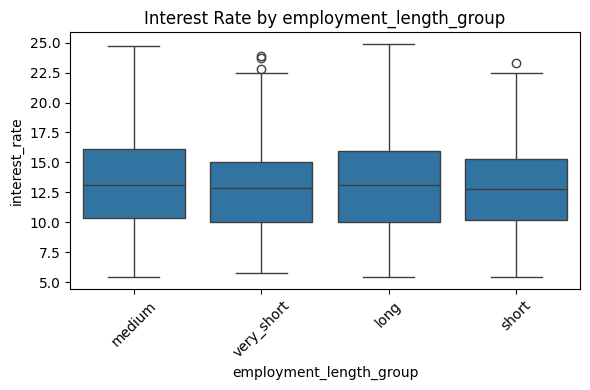

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['home_ownership', 'state_region', 'employment_length_group']

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=var, y='interest_rate', data=df)
    plt.title(f'Interest Rate by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##  Boxplot Interpretation: Interest Rate by Categorical Variables

---

### 1. `loan_purpose_grouped`
- **Debt-related** loans have the **highest median interest rates** with noticeable outliers.
- **Small personal** and **large purchases** tend to have **lower interest**.
-  **Insight:** Loan purpose clearly influences the interest rate. Paying off debt is costlier.

---

### 2. `home_ownership`
- **Renters** tend to have slightly **higher median interest rates**.
- **Owners (own or mortgage)** receive **better rates**.
-  **Insight:** Owning a home signals financial stability, earning better interest terms.

---

### 3. `state_region`
- **South** and **West** show slightly **higher median interest rates**.
- **Midwest** and **Northeast** are a bit lower.
- **Insight:** Geography affects loan costs, possibly due to regional economic factors or risk.

---

### 4. `employment_length_group`
- **Very short** employment (less than 2 years) → slightly **higher interest**.
- **Medium and long-term** employment → slightly **better rates**.
-  **Insight:** Stable work history lowers loan risk, which lowers interest rates.


# Multivariate Analysis

 Pairplots, groupby comparisons

| Situation                            | Pairplot Usage     | Purpose                                             |
| ------------------------------------ | ------------------ | --------------------------------------------------- |
| **Numerical vs Numerical**           | ✅ Yes              | See patterns, correlations, clusters, outliers      |
| **Numerical + Categorical (as hue)** | ✅ Yes (with `hue`) | Compare numerical relationships across categories   |
| **Categorical vs Categorical**       | ❌ No               | Better use a countplot or heatmap for co-occurrence |


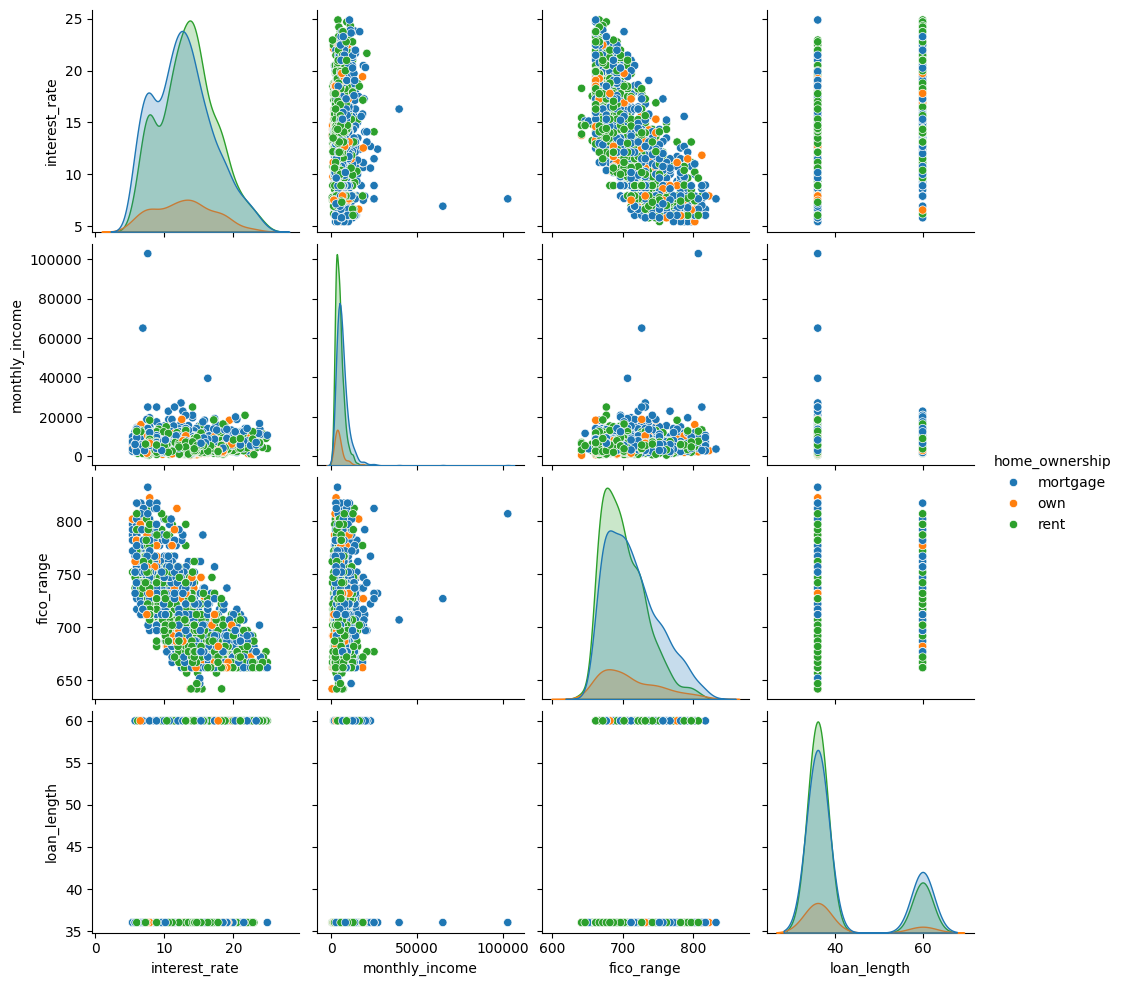

In [75]:
sns.pairplot(df[['interest_rate', 'monthly_income', 'fico_range', 'loan_length', 'home_ownership']], 
             hue='home_ownership')
plt.show()

# Pairplot on Numerical Only:

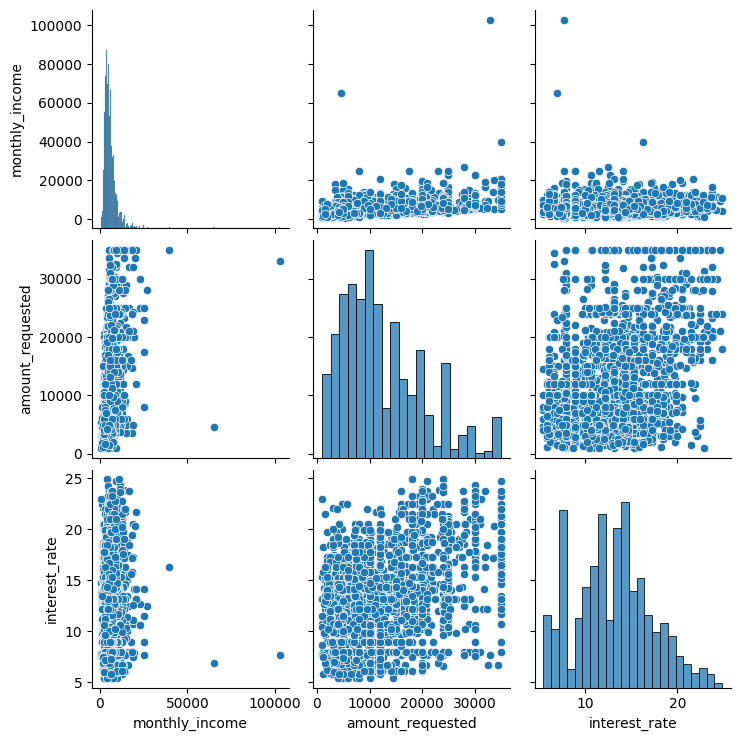

In [77]:
sns.pairplot(df[['monthly_income', 'amount_requested', 'interest_rate']])
plt.show()

# Numerical + Categorical: Pairplot

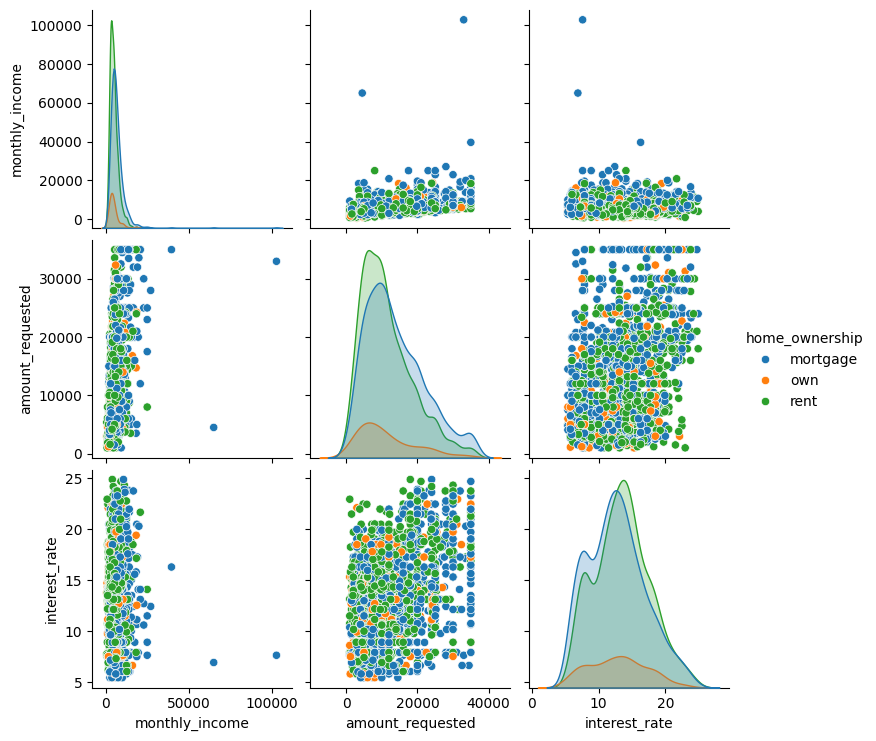

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['monthly_income', 'amount_requested', 'interest_rate', 'home_ownership']], 
             hue='home_ownership')
plt.show()